In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from typing import List, Tuple

In [134]:
def plot_data_piechart(data: pd.DataFrame, col_name: str)->None:
    """plot a pie chart of the given column"""
    #data.groupby([col_name]).sum().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90)
    data[col_name].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(12,12), title='Manufacturer', ylabel='Manufacturer')

def plot_data_hist(data: pd.DataFrame, col_name: str, bins_count: int = 1000)->None:
    """plot a histogram of the given column"""
    data.hist(column=col_name, bins=bins_count)

def plot_data_stacked_hist(list: List[List[int]], labels: List[str], colors: str, col_1: str, col_2: str, bins_count: int = 60)->None:
    """plot a stacked histogram of the given column"""
    plt.hist(list, bins=bins_count, stacked=True, density=True, color=colors, label=labels, histtype='barstacked')
    # Plot formatting
    plt.legend()
    plt.xlabel(col_2)
    plt.ylabel(col_1)
    plt.title(f'Side-by-Side Histogram between {col_1} and {col_2}')

def plot_data_boxplot(data: pd.DataFrame, col_name: str)->None:
    """plot a boxplot of the given column"""
    data.boxplot(column=col_name)

def plot_data_relationship(data: pd.DataFrame, col_name_1: str, col_name_2: str)->None:
    """plot a scatter plot of the given columns"""
    data.plot.scatter(x=col_name_1, y=col_name_2)

def print_meta_data(nums: List[float])->None:
    print("+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++")
    # print the min and max values
    print(f"Min: {np.min(nums)}")
    print(f"Max: {np.max(nums)}")
    # print the mean and median values
    print(f"Mean: {np.mean(nums)}")
    print(f"Median: {np.median(nums)}")
    # print the standard deviation
    print(f"Standard Deviation: {np.std(nums)}")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

def get_outliers(nums: List[float], use_iqd: bool = False)-> Tuple[List[int], List[float]]:
    """
    Returns a list of outliers and their indexes in the given list of numbers
    """
    outlier_indecies: List[int] = []
    outlier_values: List[float] = []
    if use_iqd:
        # compute the interquartile range
        q_1: float = float(np.percentile(nums, 25))
        q_3: float = float(np.percentile(nums, 75))
        iqr: float = q_3 - q_1
        # compute the lower and upper bounds
        lower_bound: float = q_1 - (1.5 * iqr)
        upper_bound: float = q_3 + (1.5 * iqr)
        # find the outliers
        for index, num in enumerate(nums):
            if num < lower_bound or num > upper_bound:
                outlier_indecies.append(index)
                outlier_values.append(num)
    else:
        # cast to float beacuse the return type is floating[any]
        mean: float = float(np.mean(nums))
        std: float = float(np.std(nums))
        for index, num in enumerate(nums):
            z_score: float = (num - mean) / std
            if np.abs(z_score) > 3:
                outlier_indecies.append(index)
                outlier_values.append(num)
    return outlier_indecies, outlier_values

def substitute_outliers_with_mean(nums: List[float], outlier_indexes:List[int])->List[float]:
    """return a list of numbers with outliers replaced by the most frequent value"""
    mean: float = float(np.mean(nums))
    for index in outlier_indexes:
        nums[index] = mean
    return nums

def numbers_datacleaning_pipe(nums: List[float])->List[float]:
    """returns a list of numbers with outliers replaced by the mean"""
    outlier_indexes, outlier_values = get_outliers(nums)
    # if there are no outliers, return the original list
    if len(outlier_indexes) == 0:
        return nums
    else:
        return substitute_outliers_with_mean(nums, outlier_indexes)

def clean_data(data: pd.DataFrame)->pd.DataFrame:
    data['Levy'] = data['Levy'].str.replace('-', '')
    data['turbo'] = data['Engine volume'].str.contains('Turbo', regex=False)
    data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '')
    data['Engine volume'] = data['Engine volume'].str.replace(' ', '')
    
    data.drop('Doors', axis=1, inplace=True)
    data.drop('Color', axis=1, inplace=True)
    data.drop('Wheel', axis=1, inplace=True)
    
    return data

def visualize_data(data: pd.DataFrame)->None:
    """visualize the data"""
    data['turbo'].value_counts().plot.bar()
    plt.show()

    data['Category'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Manufacturer'].value_counts().plot.bar()
    plt.show()

    plt.figure(figsize=(12,12))
    data['Engine volume'].value_counts().plot.bar()
    plt.show()

    data['Drive wheels'].value_counts().plot.bar()
    plt.show()

    data['Airbags'].value_counts().plot.bar()
    plt.show()


In [135]:
# load the dataset into pandas dataframe
df:pd.DataFrame = pd.read_csv('train.csv')
df = clean_data(df)
print(df.head())

         ID  Price  Levy Manufacturer    Model  Prod. year   Category   
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep  \
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467              HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders   
0              Yes    Hybrid           3.5  186005 km        6.0  \
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels  Airbags  turbo  
0     Automatic          4x4       12  False  
1     Tiptronic          4x4        8  False  
2      Vari

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1
Max: 26307500
Mean: 18555.92722357956
Median: 13172.0
Standard Deviation: 190576.31611155753
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 1.0
Max: 308906.0
Mean: 17113.29073045021
Median: 13172.0
Standard Deviation: 18276.756081076466
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 178.5
Max: 308906.0
Mean: 18857.837369031386
Median: 14269.0
Standard Deviation: 17407.67227533668
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


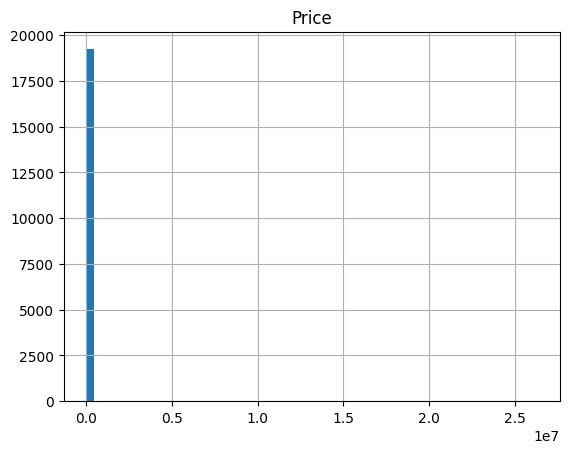

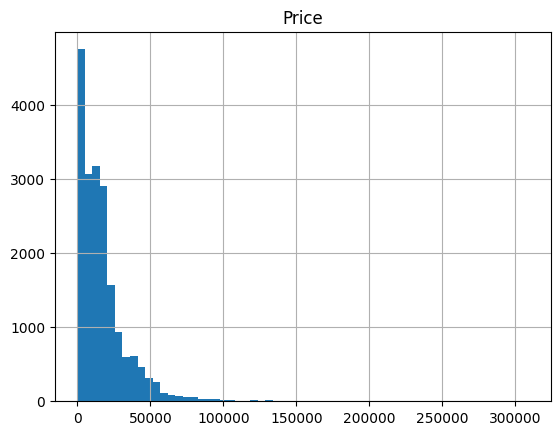

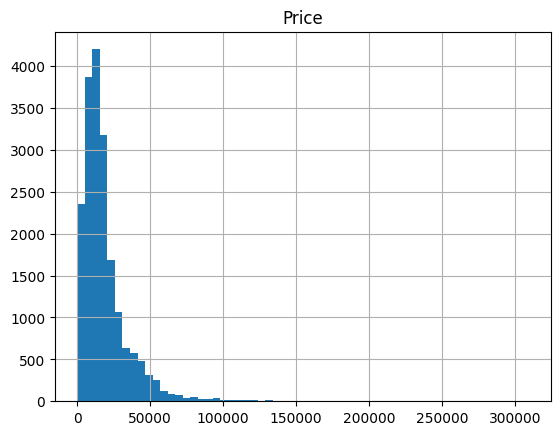

In [136]:
prices_before_cleaning: List[float] = df['Price'].values.tolist()
# print the meta data of the target variable
print_meta_data(prices_before_cleaning)
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# clean prices
prices_after_cleaning: List[float] = numbers_datacleaning_pipe(prices_before_cleaning)
# print the meta data of the target variable
print_meta_data(prices_after_cleaning)
df['Price'] = prices_after_cleaning
# plot the distribution of the target variable
plot_data_hist(df, "Price", 60)
# loop over all prices
prices: List[float] = df["Price"].values.tolist()
for index, price in enumerate(prices):
    # if the price is less than 2000 replace it with the average prices of the same car model
    if price < 1000:
        # get the car model
        car_model: str = df["Model"][index]
        # get the average price of the car model
        average_price: float = df[df["Model"] == car_model]["Price"].mean()
        if average_price == price:
            prices[index] = 1000
        else:
            # replace the price with the average price
            prices[index] = average_price
df["Price"] = prices
# plot the distribution of the target variable
print_meta_data(df["Price"].values.tolist())
plot_data_hist(df, "Price", 60)

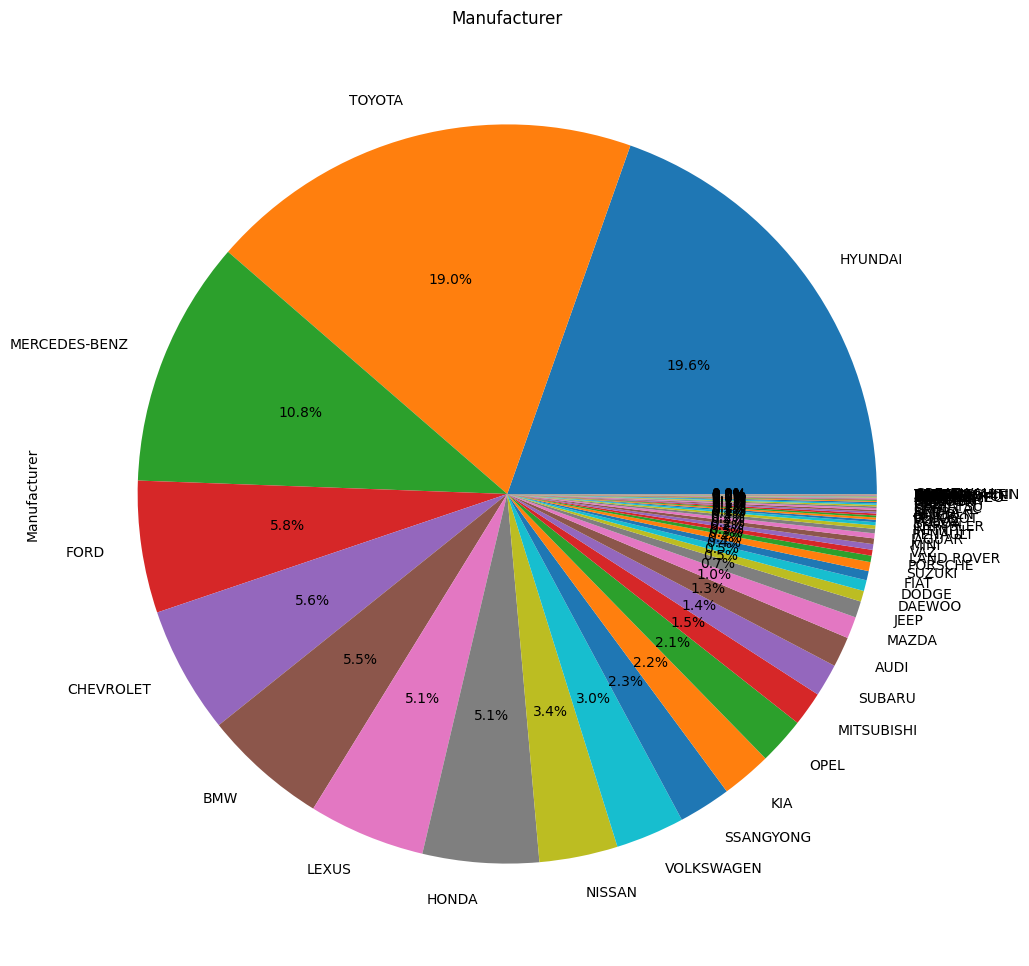

In [137]:
# plot pie char of the manufacturer
plot_data_piechart(df, 'Manufacturer')

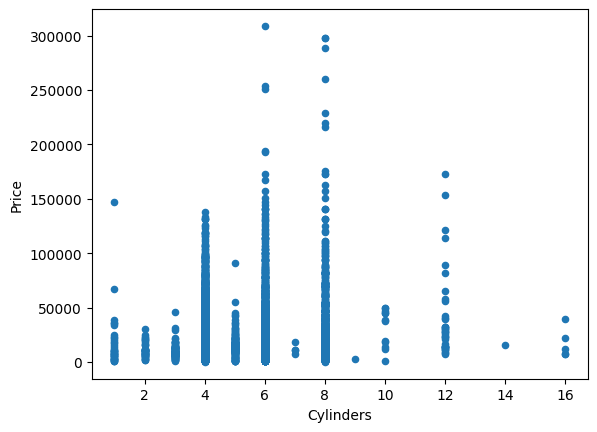

In [138]:
# plot the relationship between the price and the clinder count
plot_data_relationship(df, 'Cylinders', 'Price')

['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']


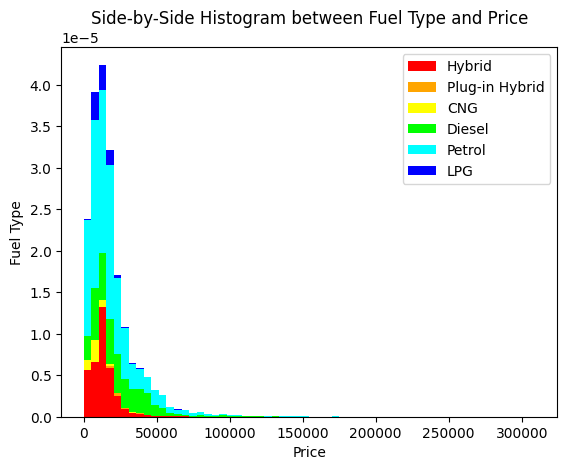

In [139]:
# print the unique values of the fuel type
print(df['Fuel type'].unique())
# Make a separate list for each Fuel type
x1 = list(df[df['Fuel type'] == 'Hybrid']['Price'])
x2 = list(df[df['Fuel type'] == 'Plug-in Hybrid']['Price'])
x3 = list(df[df['Fuel type'] == 'CNG']['Price'])
x4 = list(df[df['Fuel type'] == 'Diesel']['Price'])
x5 = list(df[df['Fuel type'] == 'Petrol']['Price'])
x6 = list(df[df['Fuel type'] == 'LPG']['Price'])
# define 6 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF']
labels = ['Hybrid', 'Plug-in Hybrid', 'CNG', 'Diesel', 'Petrol', 'LPG']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6], colors=colorls, labels=labels, col_2="Price", col_1="Fuel Type",bins_count=60)

['4x4' 'Front' 'Rear']


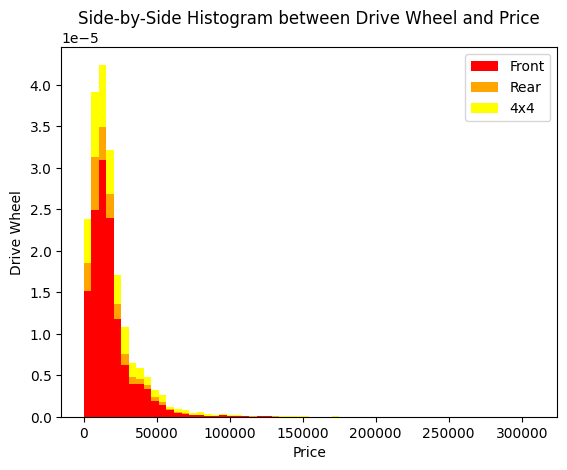

In [140]:
# print the unique values of the drive wheels
print(df['Drive wheels'].unique())
# Make a separate list for each Drive wheels
x1 = list(df[df['Drive wheels'] == 'Front']['Price'])
x2 = list(df[df['Drive wheels'] == 'Rear']['Price'])
x3 = list(df[df['Drive wheels'] == '4x4']['Price'])
# define 3 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00']
labels = ['Front', 'Rear', '4x4']
plot_data_stacked_hist(list=[x1, x2, x3], colors=colorls, col_2="Price", col_1="Drive Wheel",labels=labels, bins_count=60)

['Automatic' 'Tiptronic' 'Variator' 'Manual']


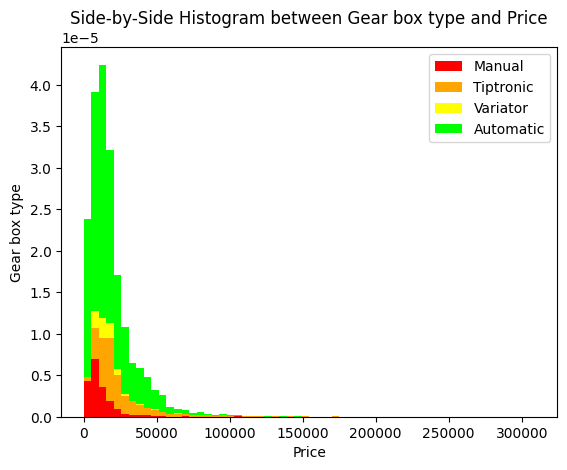

In [141]:
# print the unique values of the gear box type
print(df['Gear box type'].unique())
# Make a separate list for each Gear box type
x1 = list(df[df['Gear box type'] == 'Manual']['Price'])
x2 = list(df[df['Gear box type'] == 'Tiptronic']['Price'])
x3 = list(df[df['Gear box type'] == 'Variator']['Price'])
x4 = list(df[df['Gear box type'] == 'Automatic']['Price'])
# define 4 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00']
labels = ['Manual', 'Tiptronic', 'Variator', 'Automatic']
plot_data_stacked_hist(list=[x1, x2, x3, x4], colors=colorls, col_2="Price", col_1="Gear box type", labels=labels, bins_count=60)

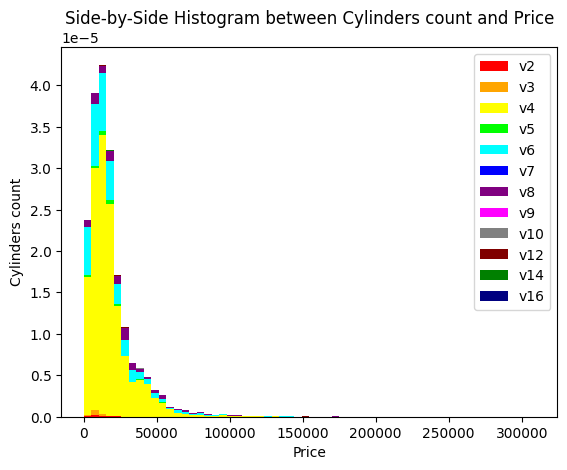

In [142]:
# Make a separate list for each Clyinders count
x1 = list(df[df['Cylinders'] == 2]['Price'])
x2 = list(df[df['Cylinders'] == 3]['Price'])
x3 = list(df[df['Cylinders'] == 4]['Price'])
x4 = list(df[df['Cylinders'] == 5]['Price'])
x5 = list(df[df['Cylinders'] == 6]['Price'])
x6 = list(df[df['Cylinders'] == 7]['Price'])
x7 = list(df[df['Cylinders'] == 8]['Price'])
x8 = list(df[df['Cylinders'] == 9]['Price'])
x9 = list(df[df['Cylinders'] == 10]['Price'])
x10 = list(df[df['Cylinders'] == 12]['Price'])
x11 = list(df[df['Cylinders'] == 14]['Price'])
x12 = list(df[df['Cylinders'] == 16]['Price'])
# define 12 colors
colorls = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#800080', '#FF00FF', '#808080', '#800000', '#008000', '#000080']
labels = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v12', 'v14', 'v16']
plot_data_stacked_hist(list=[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12], colors=colorls, col_2="Price", col_1="Cylinders count", labels=labels, bins_count=60)

In [143]:
flag: bool = True

+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 3250000.0
Mean: 144183.16932062653
Median: 126000.0
Standard Deviation: 133049.58364302307
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++Meta Data+++++++++++++++++++++++++++++++
Min: 0.0
Max: 541854.0
Mean: 136202.86143120655
Median: 126000.0
Standard Deviation: 91578.96414273059
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
min_mileage:  0.0
max_mileage:  541854.0


(array([1.019e+03, 1.040e+02, 2.020e+02, 1.690e+02, 2.000e+02, 1.710e+02,
        2.150e+02, 2.180e+02, 2.340e+02, 2.110e+02, 2.150e+02, 2.270e+02,
        3.010e+02, 3.030e+02, 2.610e+02, 2.690e+02, 2.930e+02, 3.640e+02,
        3.060e+02, 2.910e+02, 2.870e+02, 2.470e+02, 3.380e+02, 3.190e+02,
        2.960e+02, 4.610e+02, 3.490e+02, 4.700e+02, 3.530e+02, 2.940e+02,
        4.130e+02, 3.680e+02, 3.750e+02, 3.540e+02, 3.090e+02, 3.620e+02,
        5.270e+02, 4.120e+02, 2.970e+02, 3.040e+02, 3.160e+02, 2.330e+02,
        3.370e+02, 2.530e+02, 2.090e+02, 2.820e+02, 2.360e+02, 2.800e+02,
        1.840e+02, 1.860e+02, 3.470e+02, 1.330e+02, 1.570e+02, 1.230e+02,
        1.410e+02, 1.550e+02, 1.520e+02, 1.770e+02, 1.090e+02, 9.700e+01,
        1.220e+02, 9.400e+01, 1.370e+02, 7.600e+01, 1.000e+02, 1.260e+02,
        1.160e+02, 9.700e+01, 1.470e+02, 5.700e+01, 7.900e+01, 6.500e+01,
        7.500e+01, 2.700e+01, 4.000e+01, 8.800e+01, 3.200e+01, 4.200e+01,
        6.600e+01, 7.600e+01, 5.000e+0

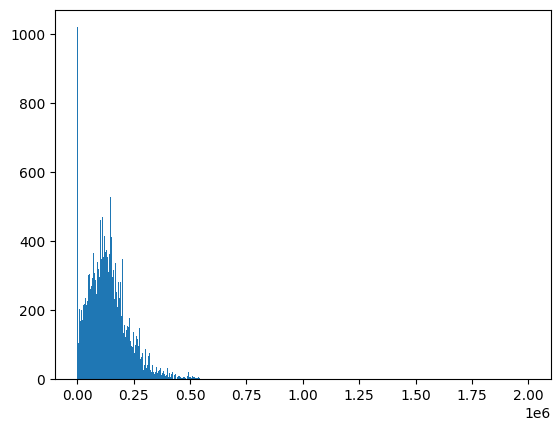

In [146]:
# remove the work km from the mileage
if flag:
    df['Mileage'] = df['Mileage'].apply(lambda x: x.split()[0])
    # convert the mileage to float
    df['Mileage'] = df['Mileage'].astype(float)
    flag = False
# remove outliers from the mileage
mileage_before_cleaning: List[float] = df["Mileage"].values.tolist()
print_meta_data(mileage_before_cleaning)
mileage_after_cleaning: List[float] = numbers_datacleaning_pipe(mileage_before_cleaning)
df['Mileage'] = mileage_after_cleaning
# plot the distribution of the mileage
print_meta_data(df["Mileage"].values.tolist())
# get the min and max values of the mileage
min_mileage: float = min(df["Mileage"].values.tolist())
max_mileage: float = max(df["Mileage"].values.tolist())
print("min_mileage: ", min_mileage)
print("max_mileage: ", max_mileage)
plt.hist(df["Mileage"].values.tolist(), range=[0, 2000000], bins=500)

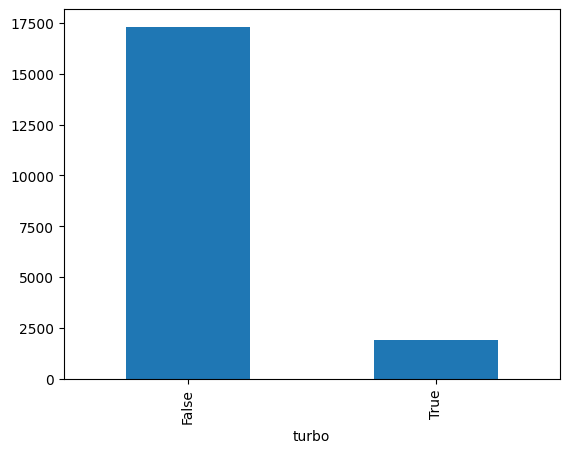

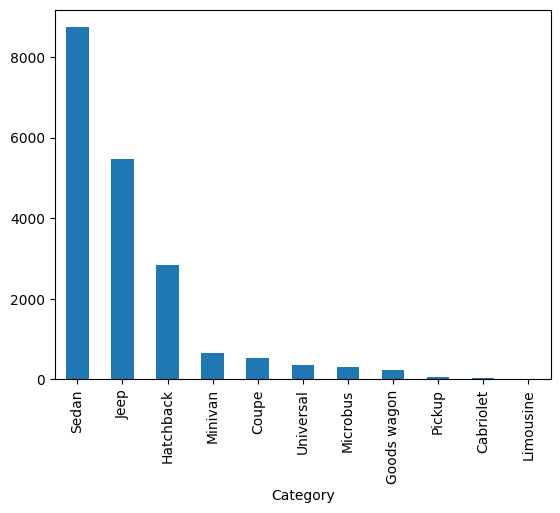

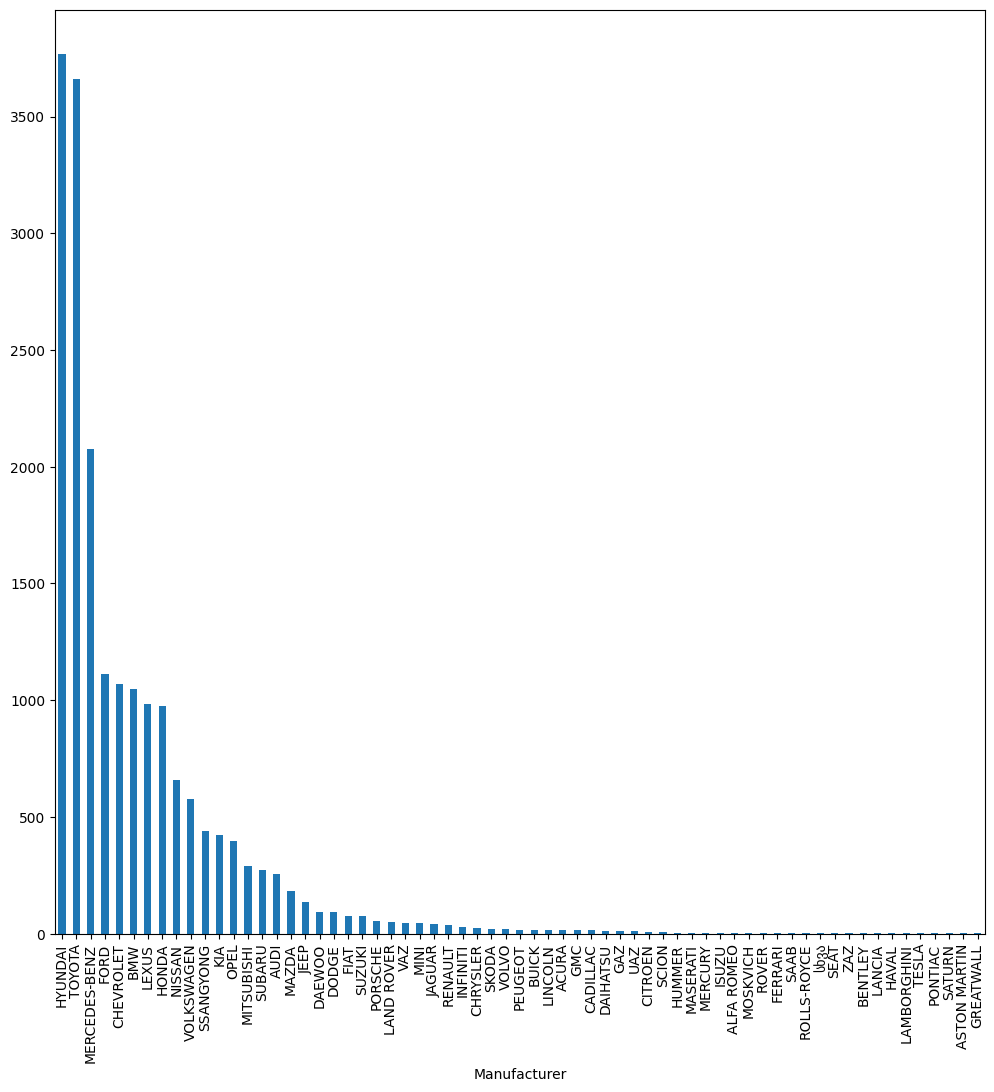

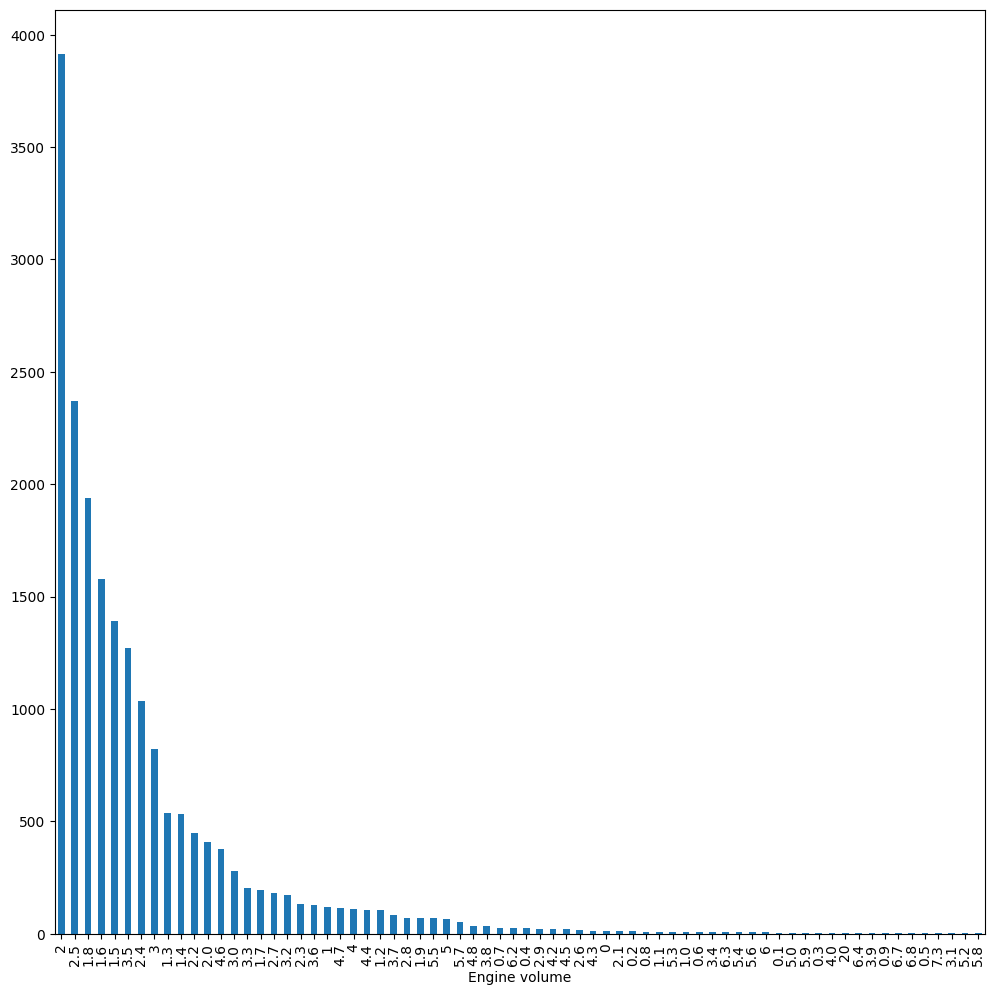

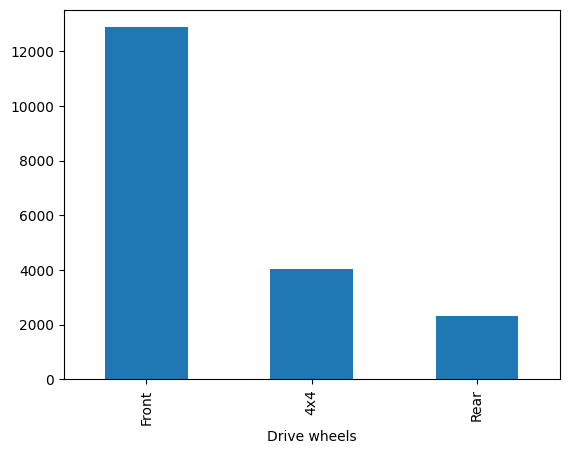

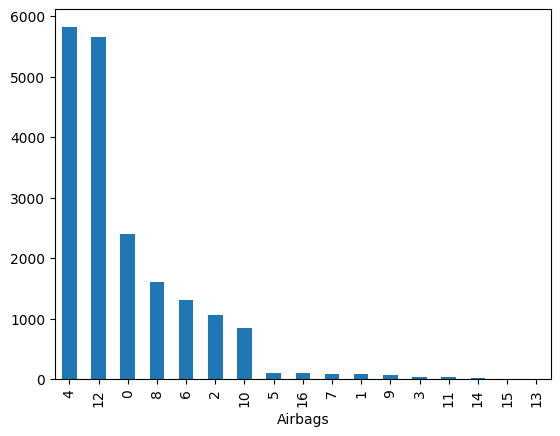

In [147]:
# plot a pie charof the car brands
visualize_data(df)
